#Estudio Steam

In [1]:
#Importamos las librerías necesarias
import urllib.request as Req
import pandas as pd
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

##Obtención y exploración de datos

In [2]:
#El dataset está en un folder comprimido. Con la libreria Zipfile puedo acceder al archivo.
data_zip=ZipFile('./videogames.zip')

In [3]:
#Aquí podemos ver los archivos dentro del folder comprimido
data_zip.filelist

[<ZipInfo filename='steam.csv' compress_type=deflate external_attr=0x20 file_size=3425223 compress_size=979195>]

In [4]:
#Asigno el archivo a una variable
data_file=data_zip.open('steam.csv')

In [5]:
#Comenzamos con la lectura en pandas y lo asignamos a una variable
steam_games=pd.read_csv(data_file)

In [6]:
#Primera exploración, vemos que columnas tienen nuestros datos. Aquí ya vemos que tenemos una columna llamada Unnamed que tiene el mismo número que nuestro número de fila.
#Ejecutamos esta línea varias veces para comprobar que esta columna tiene este dato
steam_games.sample()

,Unnamed: 0,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
810,810,Victoria II,2010-08-30,Paradox Development Studio,0,4743,632,2580,14.99€,750000.0,False,False,False,False,True,False,False,False


Esta columna Unnamed, no aporta ninguna información valiosa. Además, puede ser problemática por ejemplo, al funcionar como un contador, podríamos tener filas repetidas pero que al tener un valor distinto pasarían inadvertida.

In [7]:
#Procedemos a eliminar la columna Unnamed
steam_games.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
#Verificamos que ya no esté la columna
steam_games.sample()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
7131,TY the Tasmanian Tiger 2,2017-12-12,Krome Studios,27,337,11,0,11.39€,10000.0,True,True,False,False,False,False,False,False


In [9]:
#Revisamos la información de cada columna, podemos ver si hay valores vaciós y los tipo de columna. 
#La columna developer tiene un valor NULL
#La columna price aparece como object que hace referencia a strings y no a un número
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27103 entries, 0 to 27102
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                27103 non-null  object 
 1   release_date        27103 non-null  object 
 2   developer           27102 non-null  object 
 3   achievements        27103 non-null  int64  
 4   positive_ratings    27103 non-null  int64  
 5   negative_ratings    27103 non-null  int64  
 6   avg_hours_per_user  27103 non-null  int64  
 7   price               27103 non-null  object 
 8   sells               27103 non-null  float64
 9   action              27103 non-null  bool   
 10  adventure           27103 non-null  bool   
 11  rpg                 27103 non-null  bool   
 12  simulation          27103 non-null  bool   
 13  strategy            27103 non-null  bool   
 14  racing              27103 non-null  bool   
 15  free_to_play        27103 non-null  bool   
 16  earl

In [10]:
#Revisamos si hay valores duplicados, y sí, tenemos filas completamente iguales
steam_games.duplicated().unique()

array([False,  True])

In [11]:
#Nos deshacemos de las filas duplicadas
steam_games.drop_duplicates(inplace=True)

In [12]:
#Corrroboramos que ya no hay valores duplicados
steam_games.duplicated().unique()

array([False])

In [13]:
#Vemos nuestras columnas, consideramos cambiar de index al nombre, esto no fue ideal porque después notamos que hay juegos con nombres idénticos.
# Así que dejamos el código comentado por referencia 
steam_games.columns
#steam_games.set_index('name', inplace=True, drop=True)

Index(['name', 'release_date', 'developer', 'achievements', 'positive_ratings',
       'negative_ratings', 'avg_hours_per_user', 'price', 'sells', 'action',
       'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play',
       'early_access'],
      dtype='object')

In [14]:
#Corroboramos que la columna developer tiene valores NULL
steam_games.isnull().any()

name                  False
release_date          False
developer              True
achievements          False
positive_ratings      False
negative_ratings      False
avg_hours_per_user    False
price                 False
sells                 False
action                False
adventure             False
rpg                   False
simulation            False
strategy              False
racing                False
free_to_play          False
early_access          False
dtype: bool

In [15]:
#Procedemos a identificarlo 
steam_games.loc[steam_games['developer'].isna(),:]

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
23071,The Battle Of Ages,2018-09-07,NaN,0,2,1,0,3.99€,10000.0,True,False,True,False,False,False,False,True


In [16]:
#Modificamos este valor a un string para poder tratarlo.
steam_games.loc[steam_games['developer'].isna(),'developer']='Sin_nombre'

In [17]:
#Corroboramos que ya no hay valores NULL en la columna developer
steam_games.loc[steam_games['developer'].isna(),:]

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access


In [18]:
#Volvemos a observar la naturaleza de los datos. La columna price es string, tiene además el valor de euro
steam_games.head(5)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False


In [19]:
#Quitaremos el símbolo de euro y transformaremos los valores a tipo float
steam_games["price"]=steam_games["price"].str.replace("€", "").astype(float)

In [20]:
#Corroboramos price
steam_games.sample()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
2685,Carmageddon Max Pack,1997-06-30,Stainless Games Ltd,0,352,35,13,5.99,75000.0,True,False,False,False,False,True,False,False


#¿Cuál es el TOP10 de juegos más jugados?

In [21]:
#Obtenemos el top 10 de videojuegos más vendidos, recordemos que sells nos dice el número de copias
top10_most_sold=steam_games.sort_values(by="sells", ascending=False).head(10)

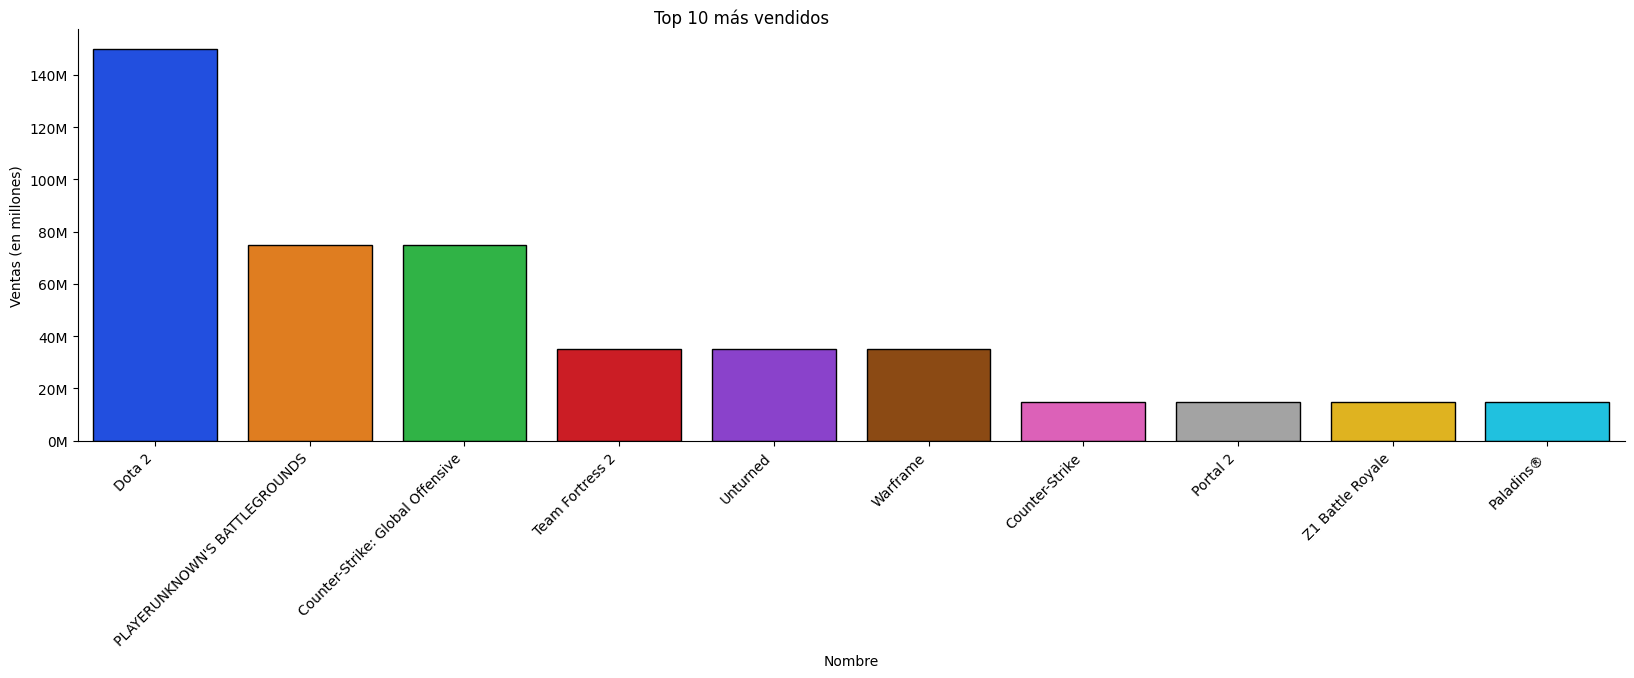

In [22]:
#Hacemos la gráfica de los juegos más vendidos, hace referencia a la cantidad de copias vendidas
g=sns.catplot(data=top10_most_sold, x="name",y="sells",
               kind='bar', hue="name", palette='bright', edgecolor='black',)
g.figure.set_size_inches(20,5)
g.figure.suptitle('Top 10 más vendidos')
g.set_axis_labels("Nombre", "Ventas (en millones)")
ax = g.ax  
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M')) # Force plain numbers

plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
#Ahora revisaremos los juegos más jugados en número de horas dedicadas. Multiplicaremos la cantidad de copias vendidas * el promedio de horas x usuario
#Esto nos dará la cantidad de horas jugadas totales de cada juego. 
top10_most_played=steam_games[['name']]
top10_most_played['played_time']=steam_games['sells']*steam_games['avg_hours_per_user']
top10_most_played=top10_most_played.sort_values(by="played_time", ascending=False).head(10)

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\194163866.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#Vemos la tabla de los 10 juegos con mayores horas de juego
top10_most_played

,name,played_time
22,Dota 2,3.591600e+12
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,1.720350e+12
25,Counter-Strike: Global Offensive,1.687050e+12
19,Team Fortress 2,2.973250e+11
0,Counter-Strike,2.641800e+11
1634,Warframe,2.045750e+11
121,Garry's Mod,1.863300e+11
2478,Grand Theft Auto V,1.475550e+11
3362,Unturned,1.136800e+11
1025,The Elder Scrolls V: Skyrim,1.063350e+11


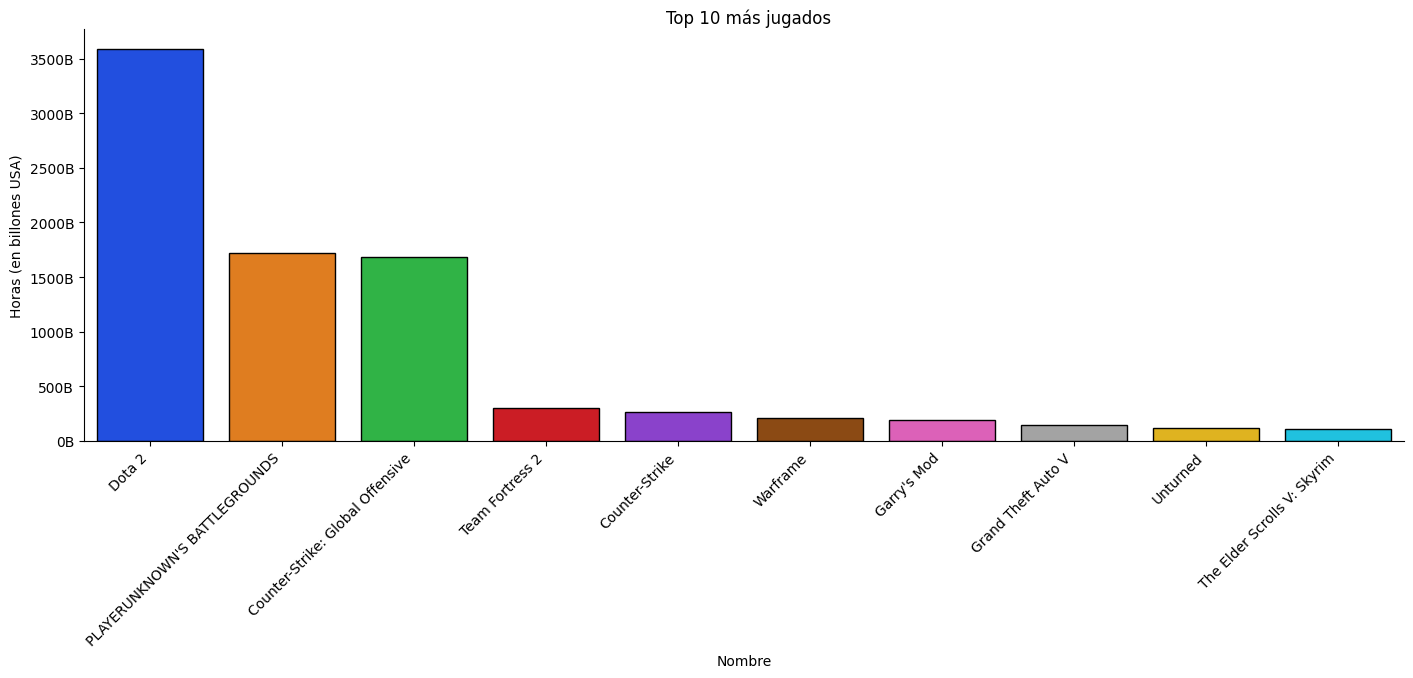

In [25]:
#Vemos la gráfica de los juegos con mayor horas de juego. Es importante reconocer que son  cifras muy largas. 
#Dividiremos entre 9 ceros, es decir llegamos a la unidad del billón estadounidense.
g=sns.catplot(data=top10_most_played, x="name",y="played_time",
               kind='bar', hue="name", palette='bright', edgecolor='black',)
g.figure.set_size_inches(20,5)
g.figure.suptitle('Top 10 más jugados')
g.set_axis_labels("Nombre", "Horas (en billones USA)")
ax = g.ax 
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e9:.0f}B')) # Force plain numbers

plt.xticks(rotation=45, ha='right')
plt.show()

#1. ¿Cuál es el TOP10 de juegos más jugados?

Pudimos resolver esta pregunta desde dos ángulos diferentes: por cantidad de copias vendidas, por cantidad de horas jugadas.
Importante. Para Steam una venta es una descarga.

Aunque la lista tiene títulos similares, destacando Dota 2 en ambos casos, tener diferentes perspectivas es bueno ya que hay varios títulos en la lista que son gratis. Es natural que los juegos gratis sean los más descargados, también suelen ser juegos sin una historia con final. Es decir, juegos sin límite de tiempo o rejugabilidad.

Pero también tenemos juegos no gratis, es imporesionante que juegos con inicio y final compitan en estas listas. 
Juegos como Elder Scrolls es de los juegos con más horas juego y sin embargo, no de los más vendidos. Es decir, con una menor base de jugadores, cada jugador juega muchas horas.

También tenemos a Portal 2, que siendo un juego corto, terminado en promedio en 8 horas, es uno de los juegos más vendidos de la historia. Nos habla de la viralidad y gran éxito que tuvo.

#¿Cuál es el género de videojuegos más vendido?

In [26]:
#Lo primero es localizar nuestros géneros
genres=steam_games.columns[9:]
print(genres)

Index(['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing',
       'free_to_play', 'early_access'],
      dtype='object')


In [27]:
#La forma de contarlos será con la propiedad booleana que hace el siguiente código, comprueba que el género es action
steam_games.loc[steam_games.index[0], "action"]

np.True_

In [28]:
#Vemos la cantidad de entradas/filas que tenemos
len(steam_games.index)-1

27074

In [29]:
#Generamos un diccionario para que podamos guardar las cantidadades. Con un doble loop y un if contaremos cuantas copias se han vendido de cada género   
sales_per_genre={key:0 for key in genres}
for i in range(0,len(steam_games.index)-1):
    for genre in genres:
        if steam_games.loc[steam_games.index[i], genre]==True:
            sales_per_genre[genre]+=steam_games.loc[steam_games.index[i], "sells"]
    

In [30]:
#Vemos que nuestro diccionario se llenó correctamente, ahora tenemos la suma de copias vendidas que corresponden a cada género
sales_per_genre

{'action': np.float64(2361690000.0),
 'adventure': np.float64(1101735000.0),
 'rpg': np.float64(696865000.0),
 'simulation': np.float64(525950000.0),
 'strategy': np.float64(768050000.0),
 'racing': np.float64(86300000.0),
 'free_to_play': np.float64(1009905000.0),
 'early_access': np.float64(155505000.0)}

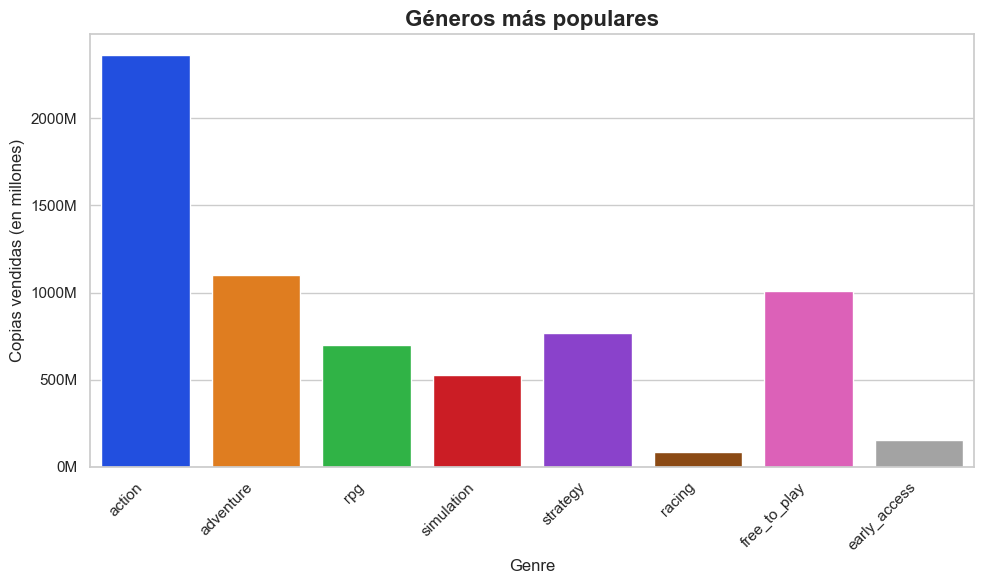

In [31]:
#Graficaremos nuestro diccionario
genres, sales = zip(*sales_per_genre.items())

# Crear el gráfico con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(genres), y=list(sales), palette="bright", hue=list(genres))

# Formatear el eje Y para mostrar las ventas en millones
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

# Personalizar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas y título
plt.title("Géneros más populares", fontsize=16, fontweight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Copias vendidas (en millones)", fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [32]:
money_per_genre={key:0 for key in genres}
for i in range(0,len(steam_games.index)-1):
    for genre in genres:
        if steam_games.loc[steam_games.index[i], genre]==True:
            money_per_genre[genre]+=steam_games.loc[steam_games.index[i], "sells"]*steam_games.loc[steam_games.index[i], "price"]

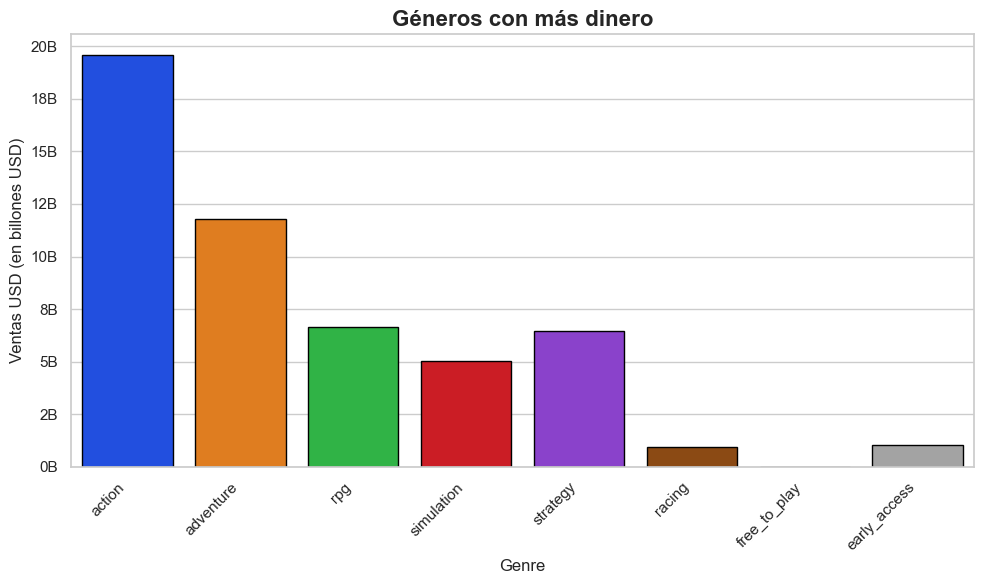

In [171]:
#Graficaremos nuestro diccionario
genres, money = zip(*money_per_genre.items())

# Crear el gráfico con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(genres), y=list(money), palette="bright", hue=list(genres), edgecolor='black')

# Formatear el eje Y para mostrar las ventas en millones
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.0f}B'))

# Personalizar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas y título
plt.title("Géneros con más dinero", fontsize=16, fontweight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Ventas USD (en billones USD)", fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#2. ¿Cuál es el género de videojuegos más vendido?

Para esta pregunta podemos tener dos ópticas, los géneros más descargados y los géneros que más dinero venden.
Es importante notar que un juego puede tener más de un género.
Es importante hacer está diferencia pues los juegos gratis (free to play) son el tercer género mas popular pero no tienen un costo más allá de las compras dentro del mismo juegos (skins, battlepass, etc.)

Observamos que el género acción es el primer lugar indiscutible en popularidad y en ventas.

También destacamos que hay género de más nicho que no ocupan el mismo lugar en popularidad y en ventas. Este es el caso de los RPG, que están debajo de estrategia en popularidad pero por encima en facturación. Esto nos dice que suelen ser más caros aunque con una base de jugadores menor. 

#¿Qué géneros tienen mejores reviews de media?

In [34]:
#Creación de columnas para esta pregunta.
#El propósito de las columnas % es saber qué porción de los reviews es positiva o negativa en cada juego.
#El propósito de las columnas participation es saber la proporción de jugadores que dejaron una review positiva o negativa.
steam_games['total_ratings']=steam_games['negative_ratings']+steam_games['positive_ratings']
steam_games['%positive_reviews']=steam_games['positive_ratings']/steam_games['total_ratings']
steam_games['%negative_reviews']=steam_games['negative_ratings']/steam_games['total_ratings']
steam_games['positive_participation']=steam_games['positive_ratings']/steam_games['sells']
steam_games['negative_participation']=steam_games['negative_ratings']/steam_games['sells']

In [35]:
#Visualizamos la correcta implementación de dichas columnas
steam_games.sample()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,...,simulation,strategy,racing,free_to_play,early_access,total_ratings,%positive_reviews,%negative_reviews,positive_participation,negative_participation
11028,SOS Survival,2018-10-31,StudioFriends,0,16,8,0,10.29,10000.0,True,...,False,False,False,False,False,24,0.666667,0.333333,0.0016,0.0008


In [36]:
#Creamos un nuevo dataframe en el que revisaremos nuestras dos perspectivas de estudio para las reseñas
review_columns=steam_games.columns[-5:].insert(1, 'positive_ratings').insert(2, 'negative_ratings').insert(0, 'sells').insert(0, 'number of games')
genre_reviews=pd.DataFrame(0,index=genres, columns=review_columns)
genre_reviews

,number of games,sells,total_ratings,positive_ratings,negative_ratings,%positive_reviews,%negative_reviews,positive_participation,negative_participation
action,0,0,0,0,0,0,0,0,0
adventure,0,0,0,0,0,0,0,0,0
rpg,0,0,0,0,0,0,0,0,0
simulation,0,0,0,0,0,0,0,0,0
strategy,0,0,0,0,0,0,0,0,0
racing,0,0,0,0,0,0,0,0,0
free_to_play,0,0,0,0,0,0,0,0,0
early_access,0,0,0,0,0,0,0,0,0


In [37]:
#Confirmamos la estructura del nuevo dataframe para acceder a los datos.
#Además revisamos las columnas que llenaremos en el siguiente loop 
genre_reviews.loc['action','total_ratings']
genre_reviews.columns[1:9]

Index(['sells', 'total_ratings', 'positive_ratings', 'negative_ratings',
       '%positive_reviews', '%negative_reviews', 'positive_participation',
       'negative_participation'],
      dtype='object')

In [38]:
#Loop para llenar nuestras 7 columnas, contando la cantidad de juegos por género y sumando las columnas de cada juego en su género correspondiente.
for i in range(0,len(steam_games.index)-1):
    for genre in genres:
        if steam_games.loc[steam_games.index[i], genre]==True:
            genre_reviews.loc[genre, 'number of games']+=1
            for column in genre_reviews.columns[1:9]:
                genre_reviews.loc[genre, column]+=steam_games.loc[steam_games.index[i], column]    

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\3004161468.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9738881546534452' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\3004161468.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.026111845346554786' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\3004161468.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.008302266666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\3004161468.py:7: FutureWarning:

Se

In [39]:
#Terminamos de calcular el promedio de reviews positivas en cada género. Recordemos que en el loop anterior realizamos la suma, por lo que al dividir entre el total de juego obtenemos el promedio.
genre_reviews['%positive_reviews']=genre_reviews['%positive_reviews']/genre_reviews['number of games']
genre_reviews['%negative_reviews']=genre_reviews['%negative_reviews']/genre_reviews['number of games']
genre_reviews['negative_participation']=genre_reviews['negative_participation']/genre_reviews['number of games']
genre_reviews['positive_participation']=genre_reviews['positive_participation']/genre_reviews['number of games']

In [40]:
#Visualizamos nuestra tabla 
#Cambiaremos el nombre de las columnas %positive_reviews por AVG_%_positive_reviews para que sea preciso.
genre_reviews.rename(columns={"%positive_reviews":"AVG_%_positive_reviews","%negative_reviews":"AVG_%_negative_reviews","positive_participation":"AVG_positive_participation","negative_participation":"AVG_negative_participation"}, inplace=True)
genre_reviews

,number of games,sells,total_ratings,positive_ratings,negative_ratings,AVG_%_positive_reviews,AVG_%_negative_reviews,AVG_positive_participation,AVG_negative_participation
action,11903,2361690000,23076274,18829730,4246544,0.709888,0.290112,0.003868,0.001236
adventure,10031,1101735000,11063033,8725068,2337965,0.713725,0.286275,0.004214,0.001230
rpg,4311,696865000,7005218,5805093,1200125,0.716261,0.283739,0.005059,0.001513
simulation,5194,525950000,5122204,4257312,864892,0.659835,0.340165,0.004370,0.001686
strategy,5247,768050000,5478947,4533369,945578,0.692914,0.307086,0.003769,0.001326
racing,1024,86300000,821577,679716,141861,0.667196,0.332804,0.003750,0.001387
free_to_play,1704,1009905000,8941644,7406653,1534991,0.699454,0.300546,0.002948,0.001011
early_access,2954,155505000,1505816,1146307,359509,0.702389,0.297611,0.004197,0.001475


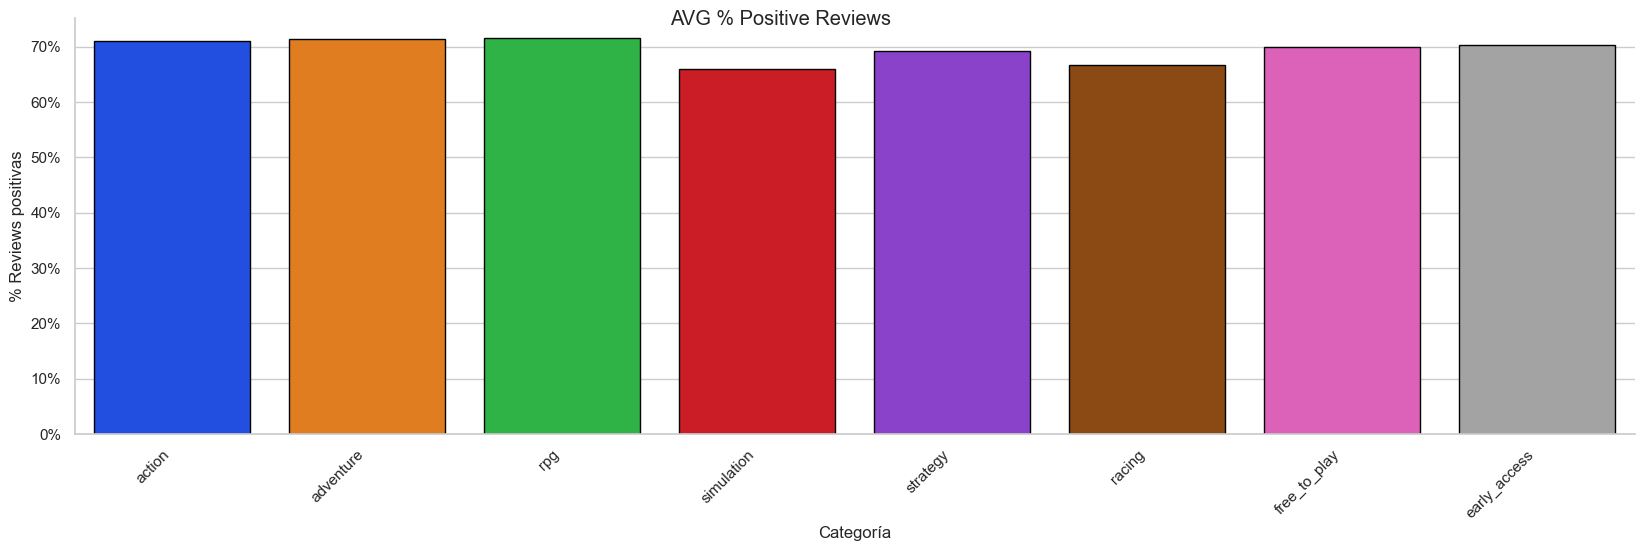

In [41]:
#Vemos la gráfica que nos muestra le promedio del porcentaje de reviews positivas de cada género.
g=sns.catplot(data=genre_reviews, x=genre_reviews.index,y="AVG_%_positive_reviews",
               kind='bar', hue=genre_reviews.index, palette='bright', edgecolor='black',)
g.figure.set_size_inches(20,5)
g.figure.suptitle('AVG % Positive Reviews')
g.set_axis_labels("Categoría", "% Reviews positivas")
# Disable scientific notation on y-axis
ax = g.ax  # Access the main axes
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x * 100:.0f}%')) # Force plain numbers

plt.xticks(rotation=45, ha='right')
plt.show()

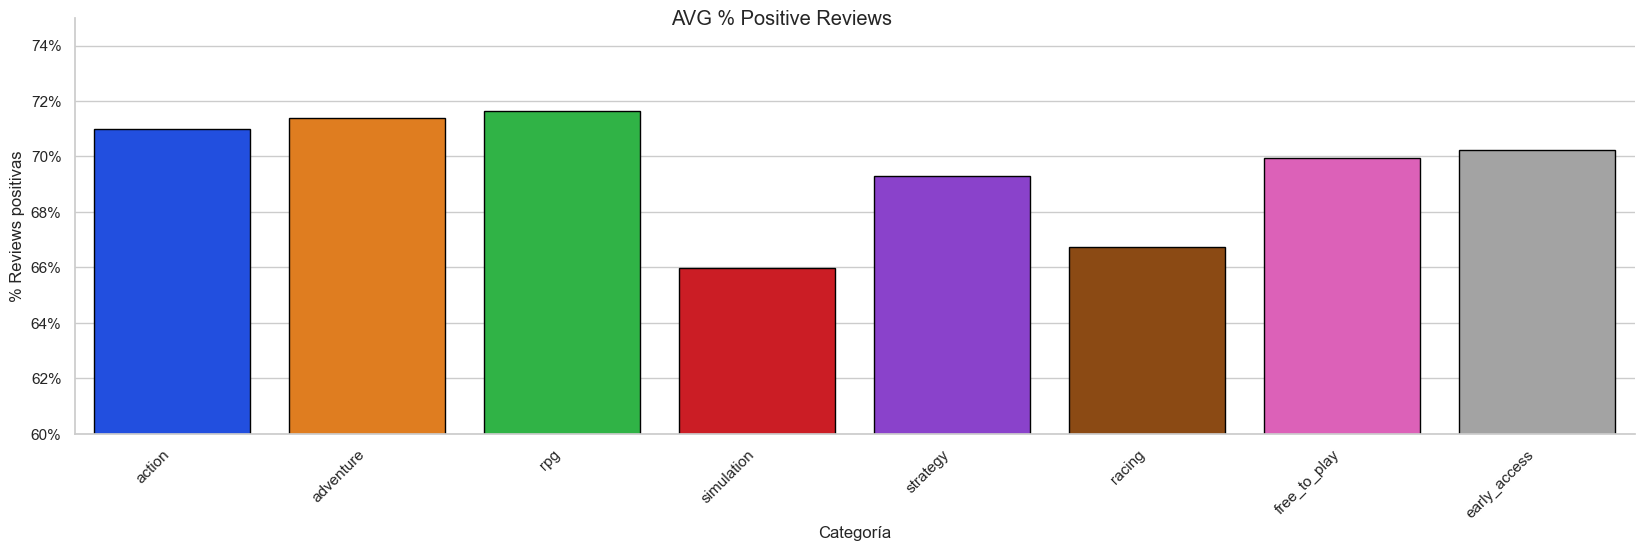

In [42]:
#Hacemos zoom cambiando el rango del eje Y.
g=sns.catplot(data=genre_reviews, x=genre_reviews.index,y="AVG_%_positive_reviews",
               kind='bar', hue=genre_reviews.index, palette='bright', edgecolor='black',)
g.figure.set_size_inches(20,5)
g.figure.suptitle('AVG % Positive Reviews')
g.set_axis_labels("Categoría", "% Reviews positivas")
# Disable scientific notation on y-axis
ax = g.ax  # Access the main axes
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x * 100:.0f}%')) # Force plain numbers
ax.set_ylim(0.6, 0.75)

plt.xticks(rotation=45, ha='right')
plt.show()

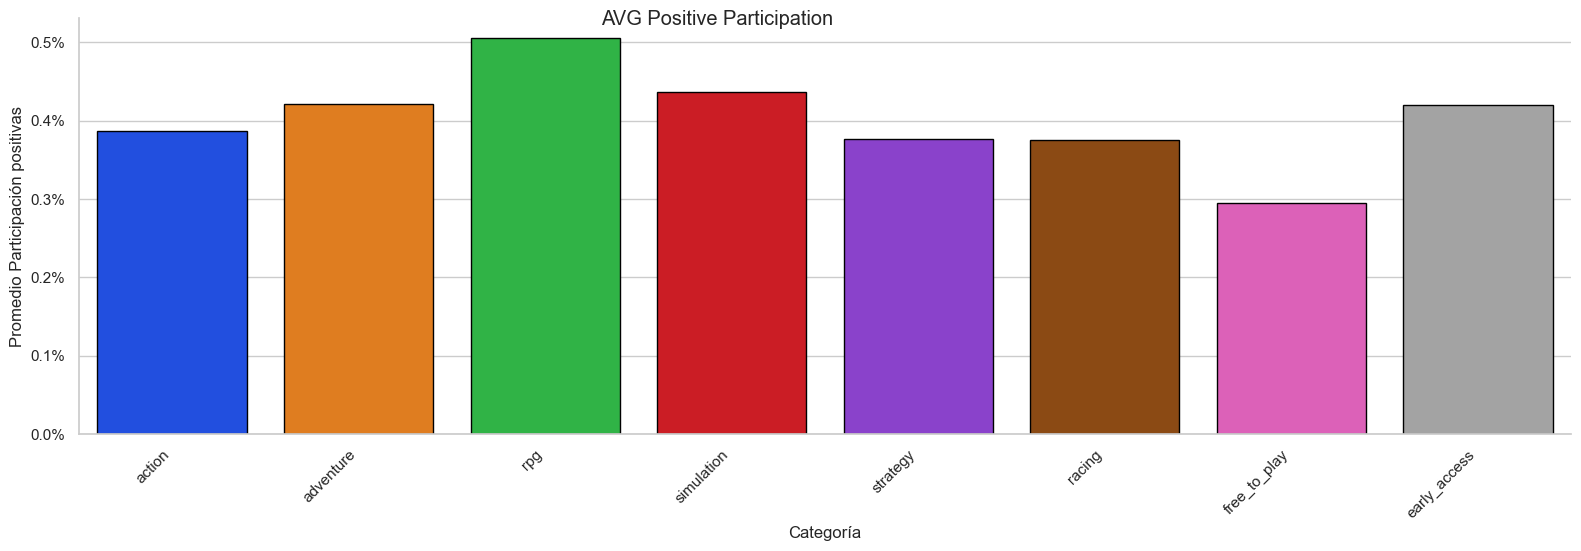

In [43]:
#Aquí vemos la gráfica de participación positiva de cada género.
g=sns.catplot(data=genre_reviews, x=genre_reviews.index,y="AVG_positive_participation",
               kind='bar', hue=genre_reviews.index, palette='bright', edgecolor='black',)
g.figure.set_size_inches(20,5)
g.figure.suptitle('AVG Positive Participation')
g.set_axis_labels("Categoría", "Promedio Participación positivas")
# Disable scientific notation on y-axis
ax = g.ax  # Access the main axes
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x *100:.1f}%')) # Force plain numbers

plt.xticks(rotation=45, ha='right')
plt.show()

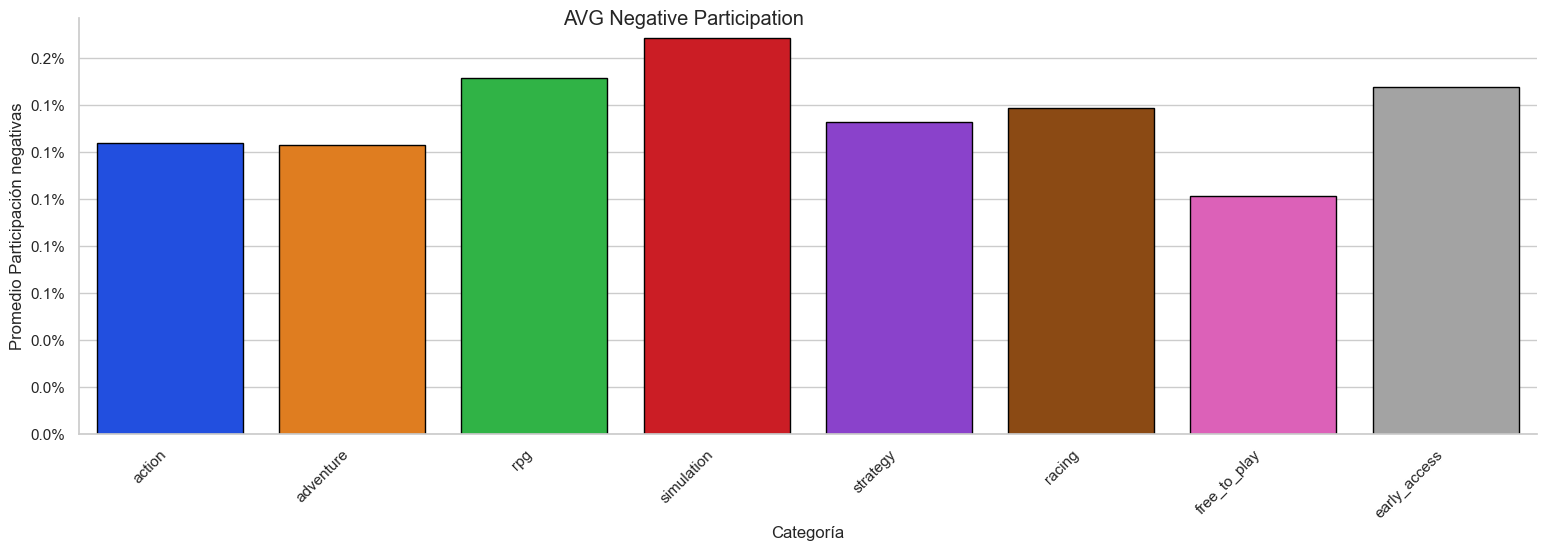

In [44]:
#Aquí vemos la gráfica de participación negativa de cada género.
g=sns.catplot(data=genre_reviews, x=genre_reviews.index,y="AVG_negative_participation",
               kind='bar', hue=genre_reviews.index, palette='bright', edgecolor='black',)
g.figure.set_size_inches(20,5)
g.figure.suptitle('AVG Negative Participation')
g.set_axis_labels("Categoría", "Promedio Participación negativas")
# Disable scientific notation on y-axis
ax = g.ax  # Access the main axes
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x *100:.1f}%')) # Force plain numbers

plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
#Confirmamos la correcta suma de los porcentajes.
genre_reviews['AVG_%_positive_reviews']+genre_reviews['AVG_%_negative_reviews']

action          1.0
adventure       1.0
rpg             1.0
simulation      1.0
strategy        1.0
racing          1.0
free_to_play    1.0
early_access    1.0
dtype: float64

In [46]:
#Dejo este cálculo para ejemplificar el incorrecto tratamiento de los reviews. Aquí sumamos todos los reviews positivos sin discriminar su popularidad.
genre_reviews['positive_ratings']/genre_reviews['total_ratings']

action          0.815978
adventure       0.788669
rpg             0.828681
simulation      0.831148
strategy        0.827416
racing          0.827331
free_to_play    0.828332
early_access    0.761253
dtype: float64

#3. ¿Qué géneros tienen mejores reviews de media?

Podemos observar que todos los géneros tienen una cantidad parecida de reviews positivas, acercándonos vemos que el género RPG es ligeramente mejor reseñado respecto a los demás.
De igual manera, los géneros Simulation y Racing están ligeramente pero reseñados.

Como complemento también me pareció importante estudiar la participación en cada género, es decir de su base de jugadores cuántos hacen una reseña positiva o negativa. Aquí vemos que el género RPG también es el género con mayor participación positiva.

Destacamos que los juegos Free to Play son a los que menos dejan reviews en general.

Por último, los juegos Simulation y RPG son en los que más dejan reviews. Es decir, los jugadores expresan más su opinión positiva o negativa

#¿Cuánto ha ganado el desarrollador que más juegos ha vendido?

In [193]:
#Creamos un nuevo dataframe para estudiar a los desarrolladores
dev_index=steam_games['developer'].unique()
dev_columns=['games_made', 'copies_sold', 'money_made']
devs=pd.DataFrame(0,index=dev_index, columns=dev_columns)
devs

,games_made,copies_sold,money_made
Valve,0,0,0
Gearbox Software,0,0,0
Valve;Hidden Path Entertainment,0,0,0
Mark Healey,0,0,0
Tripwire Interactive,0,0,0
...,...,...,...
MonteCube,0,0,0
Velvet Paradise Games,0,0,0
SHEN JIAWEI,0,0,0
Semyon Maximov,0,0,0


In [194]:
#Comprobamos la manera de acceder al dataframe
devs.loc['Valve']['money_made']

np.int64(0)

In [195]:
#Loop para poblar nuestro dataframe, recopilaremos el dinero en ventas, la cantidad de copias y la cantidad de juegos desarrollados.
for i in range(0,len(steam_games.index)-1):
    money_sold=steam_games.loc[steam_games.index[i], 'sells']*steam_games.loc[steam_games.index[i], 'price']
    devs.loc[steam_games.loc[steam_games.index[i], 'developer']]['money_made']+=money_sold
    devs.loc[steam_games.loc[steam_games.index[i], 'developer']]['copies_sold']+=steam_games.loc[steam_games.index[i], 'sells']
    devs.loc[steam_games.loc[steam_games.index[i], 'developer']]['games_made']+=1

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\2817788387.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\2817788387.py:5: FutureWarning:

ChainedAssignmentError: behaviour will change i

In [196]:
#El desarrollador con más juegos publicados
devs.sort_values(by='games_made', ascending=False).head(1)

,games_made,copies_sold,money_made
Choice of Games,94,1080000,4176200


In [197]:
#El desarrollador con mayores ventas en dinero
devs.sort_values(by='money_made', ascending=False).head(1)

,games_made,copies_sold,money_made
PUBG Corporation,1,75000000,2024250000


In [198]:
#El desarrollador con mayor cantidad de copias vendidas
devs.sort_values(by='copies_sold', ascending=False).head(1)

,games_made,copies_sold,money_made
Valve,26,405750000,1207110000


In [100]:
three_kings=devs.loc[['Choice of Games', 'PUBG Corporation', 'Valve']]

In [115]:
three_kings

,games_made,copies_sold,money_made
Choice of Games,94,1080000,4176200
PUBG Corporation,1,75000000,2024250000
Valve,26,405750000,1207110000


C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\104792746.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\104792746.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jbadi\AppData\Local\Temp\ipykernel_3092\104792746.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



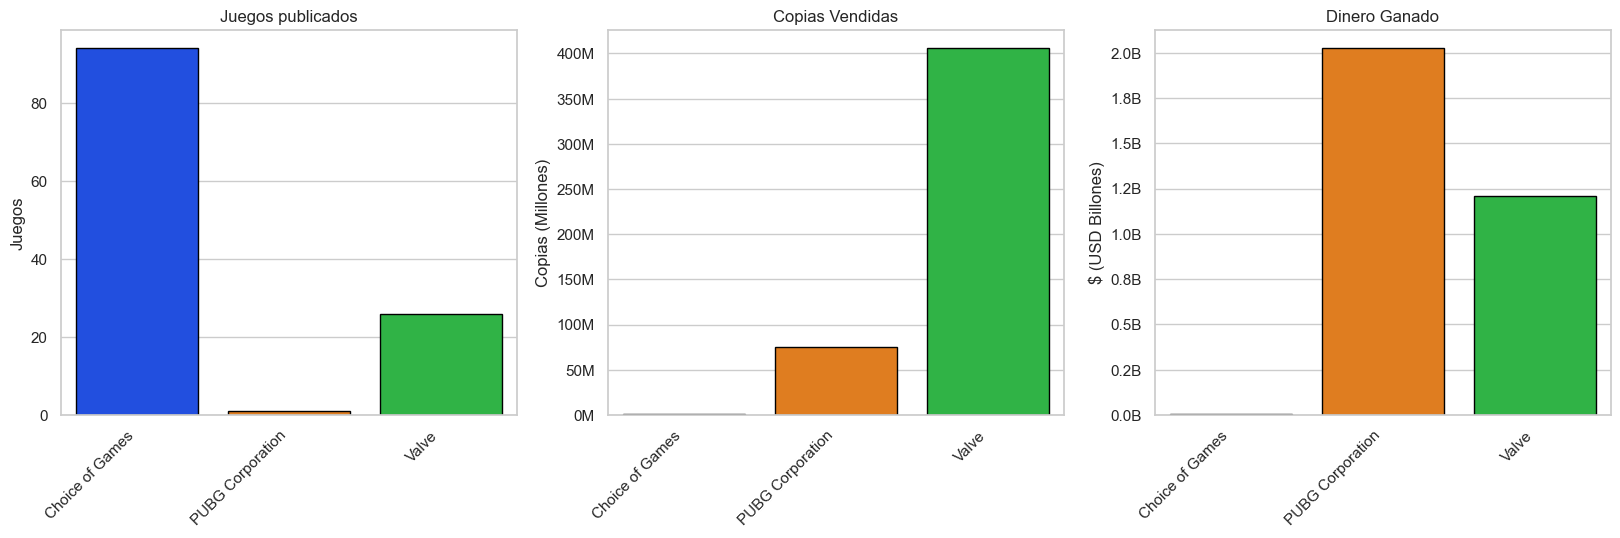

In [199]:
fig,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=(20,5))
sns.barplot(ax=ax1,x=three_kings.index, y=three_kings['games_made'], palette='bright', hue=three_kings.index, edgecolor='black')
ax1.set_title('Juegos publicados')
ax1.set(xlabel=None)
ax1.set_xticklabels(three_kings.index, rotation=45, horizontalalignment='right')
ax1.set_ylabel('Juegos')

sns.barplot(ax=ax2,x=three_kings.index, y=three_kings['copies_sold'], palette='bright', hue=three_kings.index, edgecolor='black')
ax2.set_title('Copias Vendidas')
ax2.set(xlabel=None)
ax2.set_xticklabels(three_kings.index, rotation=45, horizontalalignment='right')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
ax2.set_ylabel('Copias (Millones)')

sns.barplot(ax=ax3,x=three_kings.index, y=three_kings['money_made'], palette='bright', hue=three_kings.index, edgecolor='black')
ax3.set_title('Dinero Ganado')
ax3.set(xlabel=None)
ax3.set_xticklabels(three_kings.index, rotation=45, horizontalalignment='right')
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))
ax3.set_ylabel('$ (USD Billones)')

plt.show()



In [188]:
steam_games.loc[(steam_games['developer']=='Valve') & (steam_games['free_to_play']==True)]

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,...,simulation,strategy,racing,free_to_play,early_access,total_ratings,%positive_reviews,%negative_reviews,positive_participation,negative_participation
19,Team Fortress 2,2007-10-10,Valve,520,515879,34036,8495,0.0,35000000.0,True,...,False,False,False,True,False,549915,0.938107,0.061893,0.014739,0.000972
22,Dota 2,2013-07-09,Valve,0,863507,142079,23944,0.0,150000000.0,True,...,False,True,False,True,False,1005586,0.858710,0.141290,0.005757,0.000947
8407,The Lab,2016-04-05,Valve,0,2926,145,95,0.0,750000.0,False,...,False,False,False,True,False,3071,0.952784,0.047216,0.003901,0.000193


#4. ¿Cuánto ha ganado el desarrollador que más juegos ha vendido?

En esta pregunta podemos tomar en cuenta la cantidad de copias vendidas, siendo Valve con más de 400 millones de copias, representando una venta de casi 1.3 USD billones.

La otra perspectiva es cuánto ha ganado el desarrollador con más títulos, siendo Choice of games con 4.1 USD millones.

Además, obtuvimos al desarrollador que más dinero ha ganado vendiendo títulos. Este es PUBG Coporation con 2 USD billones.

Es muy interesante que PUBG Corporation solo tiene 1 título publicado, y así, es el ganador en dinero. Mientras que Choice of Games, siendo el desarrollador con la mayor cantidad de títulos no está ni cerca del dinero en ventas de Valve o PUBG Corporation. Poder conocer los costos de desarrollo nos permitiría acceder a la rentabilidad y al trabajo necesario que invierte cada uno de estos desarrolladores.
Haciendo una investigación rápida, parece que los juegos de Choice of Games, son juegos sencillos, siempre con la misma mecánica. Tal vez, el trabajo invertido y la cantidad de personal es baja. Haciendo que la rentabilidad se divida en pocas manos.

Por último, hacer notar que Valve es el desarrollador de Dota 2, el juego más descargado en nuestro data set. Dota 2 es un juego free to play, es decir, que gran parte de las copias vendidas que vemos de Valve no han generado dinero.

#¿Cómo afecta a las reviews que un juego sea Early Access?

In [205]:
genre_reviews

,number of games,sells,total_ratings,positive_ratings,negative_ratings,AVG_%_positive_reviews,AVG_%_negative_reviews,AVG_positive_participation,AVG_negative_participation
action,11903,2361690000,23076274,18829730,4246544,0.709888,0.290112,0.003868,0.001236
adventure,10031,1101735000,11063033,8725068,2337965,0.713725,0.286275,0.004214,0.001230
rpg,4311,696865000,7005218,5805093,1200125,0.716261,0.283739,0.005059,0.001513
simulation,5194,525950000,5122204,4257312,864892,0.659835,0.340165,0.004370,0.001686
strategy,5247,768050000,5478947,4533369,945578,0.692914,0.307086,0.003769,0.001326
racing,1024,86300000,821577,679716,141861,0.667196,0.332804,0.003750,0.001387
free_to_play,1704,1009905000,8941644,7406653,1534991,0.699454,0.300546,0.002948,0.001011
early_access,2954,155505000,1505816,1146307,359509,0.702389,0.297611,0.004197,0.001475


In [ ]:
#Haremos un boxplot para ver la distribución de las reviews

In [ ]:
#vemos la estructura del dataset una vez más
steam_games.sample()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,...,simulation,strategy,racing,free_to_play,early_access,total_ratings,%positive_reviews,%negative_reviews,positive_participation,negative_participation
27038,Nyasha Land of Elves,2019-04-13,Zloy Krot Studio,32,8,3,0,0.79,10000.0,False,...,False,False,False,False,False,11,0.727273,0.272727,0.0008,0.0003


In [200]:
#Cambiaremos los datos de la columna release_date para que estén en formato de fecha
steam_games['release_date']=pd.to_datetime(steam_games['release_date'])

In [204]:
#
steam_games['release_date'].dt.month_name().value_counts().sort_values(ascending=False).plot(kind='bar')

pandas.core.frame.DataFrame

In [ ]:
#Aquí vemos la gráfica de participación negativa de cada género.
g=sns.catplot(data=genre_reviews, x=genre_reviews.index,y="AVG_negative_participation",
               kind='bar', hue=genre_reviews.index, palette='bright', edgecolor='black',)
g.figure.set_size_inches(20,5)
g.figure.suptitle('AVG Negative Participation')
g.set_axis_labels("Categoría", "Promedio Participación negativas")
# Disable scientific notation on y-axis
ax = g.ax  # Access the main axes
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x *100:.1f}%')) # Force plain numbers

plt.xticks(rotation=45, ha='right')
plt.show()

In [55]:
achievement_by_year=steam_games.groupby(steam_games['release_date'].dt.year)['achievements'].sum()
print(achievement_by_year)

release_date
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004       180
2005         0
2006       145
2007       568
2008       787
2009      2065
2010      3711
2011      6365
2012      9823
2013     15887
2014     30908
2015     49876
2016     84153
2017    472998
2018    518253
2019     29394
Name: achievements, dtype: int64


<Axes: xlabel='release_date'>

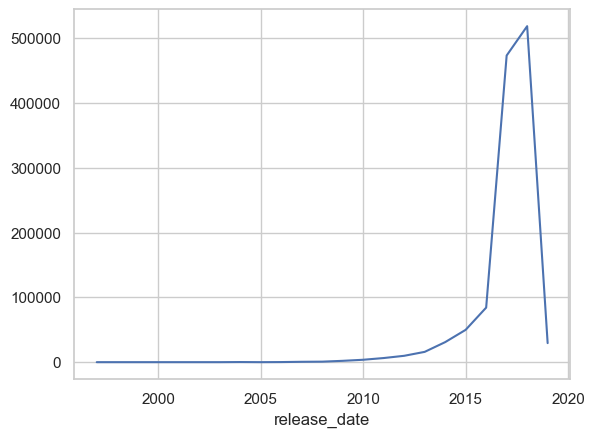

In [56]:
achievement_by_year.plot(kind='line')

<Axes: xlabel='release_date'>

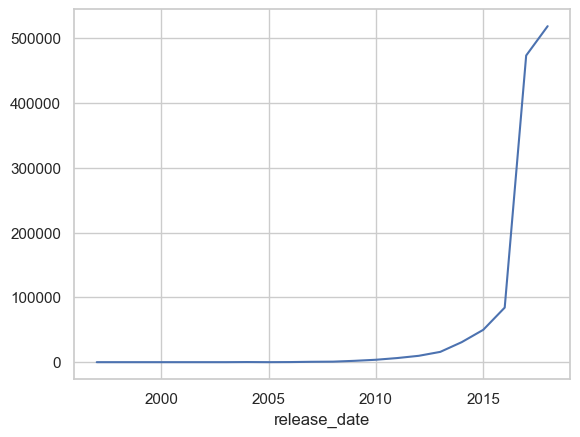

In [57]:
achievement_by_year[:-1].plot(kind='line')

In [58]:
steam_games['name']

0                    Counter-Strike
1             Team Fortress Classic
2                     Day of Defeat
3                Deathmatch Classic
4         Half-Life: Opposing Force
                    ...            
27070               Room of Pandora
27071                     Cyber Gun
27072              Super Star Blast
27073    New Yankee 7: Deer Hunters
27074                     Rune Lord
Name: name, Length: 27075, dtype: object

In [59]:
logros_juegos_by_year=pd.pivot_table(steam_games,  index=steam_games['release_date'].dt.year, values=['achievements', 'name'], aggfunc={'achievements':'sum','name': 'count'})
logros_juegos_by_year.columns=(['Cantidad_logros', 'Cantidad_Juegos'])

In [60]:
print(logros_juegos_by_year)

              Cantidad_logros  Cantidad_Juegos
release_date                                  
1997                        0                1
1998                        0                1
1999                        0                2
2000                        0                2
2001                        0                4
2002                        0                1
2003                        0                3
2004                      180                6
2005                        0                6
2006                      145               48
2007                      568               93
2008                      787              145
2009                     2065              305
2010                     3711              238
2011                     6365              239
2012                     9823              320
2013                    15887              418
2014                    30908             1555
2015                    49876             2597
2016         

<Axes: xlabel='release_date'>

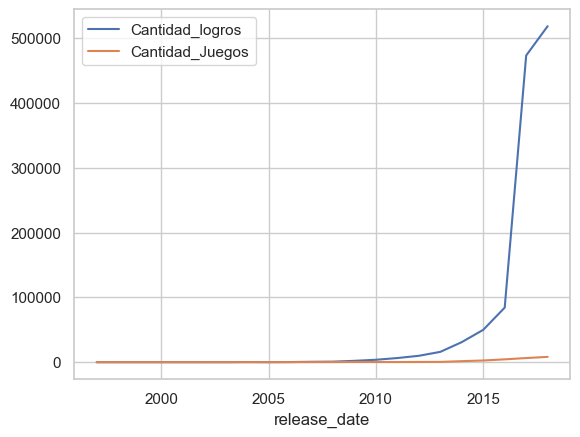

In [61]:
logros_juegos_by_year[:-1].plot(kind='line')

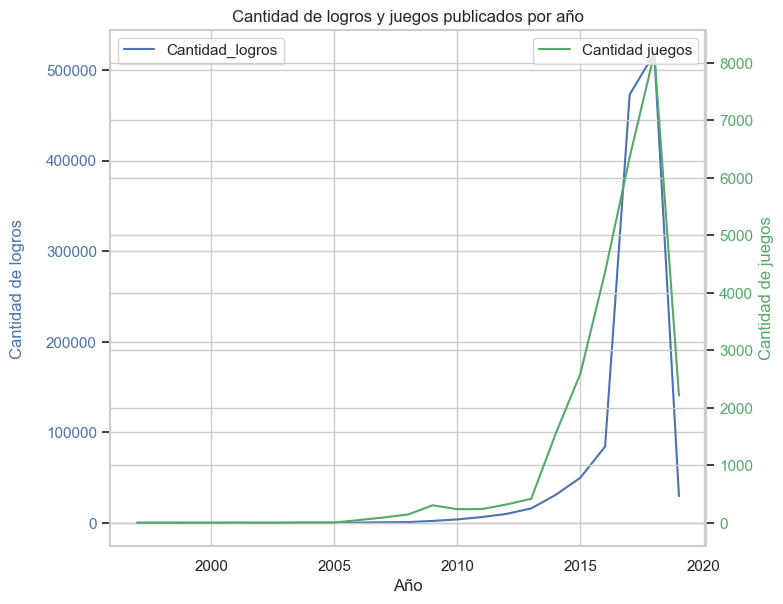

In [62]:
# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(8, 6))

# Graficar la primera línea (cantidad_logros) en el primer eje y
sns.lineplot(x='release_date', y='Cantidad_logros', data=logros_juegos_by_year, ax=ax1, color='b', label='Cantidad_logros')
ax1.set_ylabel('Cantidad de logros', color='b', labelpad=15)
ax1.set_xlabel('Año')
ax1.tick_params(axis='y', labelcolor='b')

# Crear el segundo eje y
ax2 = ax1.twinx()

# Graficar la segunda línea (cantidad_juegos) en el segundo eje y
sns.lineplot(x='release_date', y='Cantidad_Juegos', data=logros_juegos_by_year, ax=ax2, color='g', label='Cantidad juegos')
ax2.set_ylabel('Cantidad de juegos', color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax2.legend(loc='upper right')


fig.tight_layout()
# Mostrar el gráfico
plt.title('Cantidad de logros y juegos publicados por año')
plt.show()